<h2><font color="#004D7F" size=6> Expresiones regualares Tarea2</font></h2>



<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Danyela Luengas</font><br>
<font color="#004D7F" size=3>Procesamiento de lenguaje natural o minería de textos</font><br>

## Tarea

Se tiene un archivo (dates.txt) donde cada línea de este corresponde a una nota médica y cada nota tiene una fecha que debe extraerse, pero cada fecha está codificada en uno de muchos formatos. Por ejemplo, se muestra a continuación una lista de algunas de las variantes que se puede encontrar en este conjunto de datos:
<ul>
    <li>04/20/2009; 04/20/09; 4/20/09; 4/3/09</li>
    <li>Mar-20-2009; Mar 20, 2009; March 20, 2009; Mar. 20, 2009; Mar 20 2009;</li>
    <li>20 Mar 2009; 20 March 2009; 20 Mar. 2009; 20 March, 2009</li>
    <li>Mar 20th, 2009; Mar 21st, 2009; Mar 22nd, 2009</li>
    <li>Feb 2009; Sep 2009; Oct 2010</li>
    <li>6/2008; 12/2009</li>
    <li>2009; 2010</li>
</ul>
La actividad consiste en:
<p>a). Identificar correctamente todas las diferentes variantes de fecha codificadas en este conjunto de datos, normalizar y ordenar adecuadamente las fechas.</p>
<p>b).	Una vez que haya extraído estos patrones de fecha del texto, el siguiente paso es clasificarlos en orden cronológico ascendente de acuerdo con las siguientes reglas:</p>
<ul>
    <li>Todas las fechas están en formato xx/xx/xx son mm/dd/aa</li>
    <li>Todas las fechas en las que el año está codificado en solo dos dígitos corresponden a años posteriores a la década de 1900 (p. Ej., 1/5/89 es el 5 de enero de 1989).</li>
    <li>Si falta el día (p. Ej., 9/2009), suponga que es el primer día del mes (p. Ej., septiembre, 1 de 2009).</li>
    <li>Si falta el mes (por ejemplo, 2010), suponga que es el primero de enero de ese año (p. Ej., enero, 1 de 2010).</li>
    <li>Tenga cuidado con los posibles errores tipográficos, ya que este es un conjunto de datos derivados de la vida real.</li>
    <li>Para el ordenamiento cronológico puede hacer uso de la librería de datetime de Python.</li>
</ul>
Esta función debería devolver una lista de longitud 500.


In [3]:
#lee el archivo
import re
import pandas as pd 

dat=open('dates.txt','r',  encoding='utf8')
dat.seek(0)
tex1=dat.read()


tex2=re.split("\n+", tex1)
type(tex1)

str

In [4]:
# convierte  list a str 
tex=' '.join([str(item) for item in tex2])
type(tex2)

list

In [23]:
#re.compile(r'^(0?[1-9]|[12][0-9]|3[01])/(0?[1-9]|1[012])/((19|20)\d\d)$')
    
re.compile(r'^([a-z0-9\.-_ ])+([-/ ])(0?[1-9]|[12][0-9]|3[01])([-/ ])(\d\d)$')

re.compile(r'^([a-z0-9\.-_ ])+([-/ ])(0?[1-9]|[12][0-9]|3[01])([-/ ])(\d\d)$',
           re.UNICODE)

In [43]:
#extrae las fechas 
x1=[w for w in tex.split(' ') if re.search('^(0?[1-9]|[12][0-9]|3[01])/(0?[1-9]|1[012])/((19|20)\d\d)$', w)  ] 
x2=[w for w in tex.split(' ') if re.search('^(0?[1-9]|1[012])([-/ ])(0?[1-9]|[12][0-9]|3[01])([-/ ])((19|20)\d\d)$', w)  ] 
x3=[w for w in tex.split(' ') if re.search('^(0?[1-9]|[12][0-9]|3[01])([-/ , ])((19|20)\d\d)$', w)  ] 
x4=[w for w in tex.split(' ') if re.search('^((19|20)\d\d)$', w)  ] 
x5=[w for w in tex.split(' ') if re.search('^([a-zA-Z])([-/ ])(0?[1-9]|[12][0-9]|3[01])([-/ ])(\d\d)$', w)  ] 

x7=[w for w in tex.split(' ') if re.search('^(0?[1-9]|[12][0-9]|3[01])/[a-zA-Z]/((19|20)\d\d)$', w)  ] 

x6=[w for w in tex.split(' ') if re.search('(\d|\d{2})\s(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|January|February|March|April|May|June|July|August|September|October|November|December)([-/ , ])((19|20)\d\d)$',w)]
x6

[]

In [8]:
#unse las listas 
x=(x1+ x2+x3+x4+x5+x6)
#convierte en datatime l lista
#xx=pd.to_datetime(x)
#xxx=pd.to_datetime(xx, dayfirst=True, format= "%Y-%m-%d",  errors = 'coerce')
x

['5/12/2012',
 '10/11/1987',
 '12/5/2010',
 '11/3/1985',
 '01/05/1999',
 '7/07/1974',
 '8/09/1981',
 '04/08/2004',
 '12/08/1990',
 '4/11/1974',
 '2/11/2006',
 '5/24/1990',
 '1/25/2011',
 '10/13/1976',
 '07/25/1984',
 '03/31/1985',
 '5/12/2012',
 '7/27/1986',
 '4/13/2002',
 '2/15/1998',
 '10/11/1987',
 '12/5/2010',
 '08/20/1982',
 '07/29/1994',
 '11/3/1985',
 '01/05/1999',
 '7/07/1974',
 '09/14/2000',
 '8/09/1981',
 '04/08/2004',
 '12/08/1990',
 '4/11/1974',
 '07/18/2002',
 '2/11/2006',
 '7/20/2011',
 '4/27/2006',
 '6/1998',
 '10/1973',
 '9/2005',
 '03/1980',
 '12/2005',
 '5/1987',
 '5/2004',
 '3/1986',
 '10/1997',
 '3/1993',
 '3/1981',
 '9/2003',
 '10/1993',
 '7/1994',
 '12/2008',
 '10/1980',
 '12/1975',
 '7/2014',
 '9/2001',
 '8/1986',
 '1/1978',
 '1/2009',
 '11/2000',
 '06/1973',
 '12/1978',
 '8/2009',
 '1/2014',
 '09/1975',
 '12/2012',
 '7/1989',
 '7/2009',
 '3/1995',
 '2/2009',
 '08/1988',
 '4/2007',
 '5/2000',
 '4/2012',
 '10/2001',
 '2/1977',
 '8/2008',
 '2/1983',
 '5/1979',
 '11

In [8]:
# utiliza la librería numpy para organizar de forma cronologica 
import numpy as np
fechas=np.array(xxx)
fechas.sort()


In [9]:
fechas

array(['1972-01-01T00:00:00.000000000', '1972-01-01T00:00:00.000000000',
       '1972-01-01T00:00:00.000000000', '1972-01-01T00:00:00.000000000',
       '1972-01-01T00:00:00.000000000', '1972-01-26T00:00:00.000000000',
       '1972-05-13T00:00:00.000000000', '1972-06-10T00:00:00.000000000',
       '1972-07-20T00:00:00.000000000', '1973-01-01T00:00:00.000000000',
       '1973-01-01T00:00:00.000000000', '1973-02-01T00:00:00.000000000',
       '1973-02-14T00:00:00.000000000', '1973-04-01T00:00:00.000000000',
       '1973-06-01T00:00:00.000000000', '1973-10-01T00:00:00.000000000',
       '1973-12-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-02-01T00:00:00.000000000', '1974-02-24T00:00:00.000000000',
       '1974-04-01T00:00:00.000000000', '1974-04-11

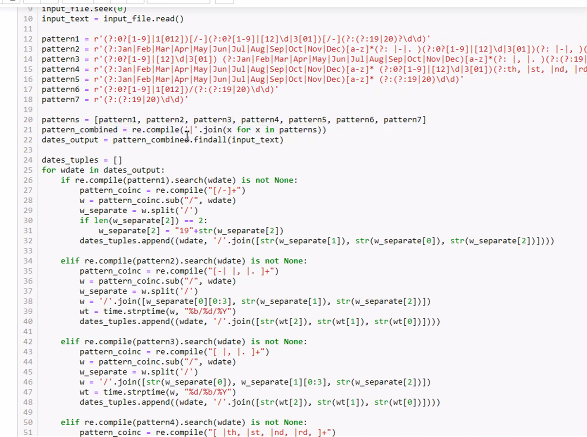
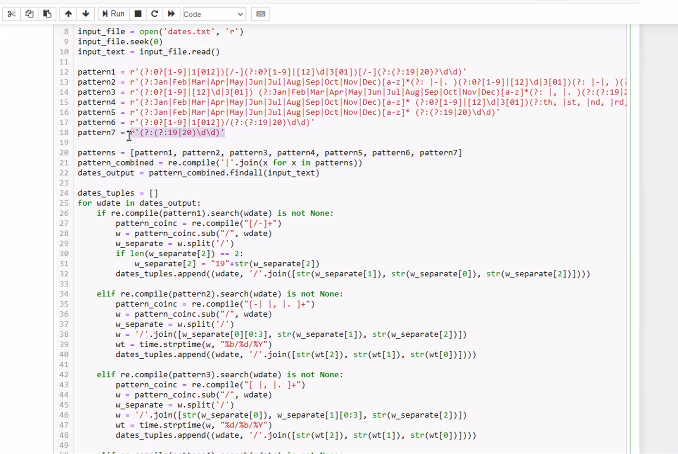